In [1]:
import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

2025-01-15 11:44:30.220351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736928870.238120   64154 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736928870.243349   64154 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-15 11:44:30.262581: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
digits  = load_digits()

x = digits.data
y =  digits.target
print(x,y)
print(x.shape,y.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]
(1797, 64) (1797,)


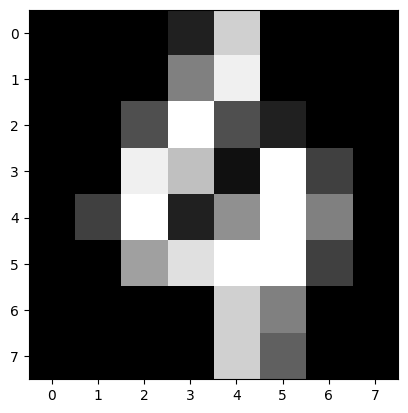

4


In [3]:
plt.gray()
plt.imshow(digits.images[100])
plt.show()
print(digits.target[100])

### Pre-Process Data

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x = x.reshape(-1,64)
x =  x/255
x = x.reshape([-1,8,8,1])
y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x.shape, x_train.shape)
print(y[0], y_train.shape)

(1797, 8, 8, 1) (1437, 8, 8, 1)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (1437, 10)


### Define Model

In [5]:
model = keras.Sequential([])
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", strides=(1,1), input_shape=(8,8,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy, metrics=["accuracy"],)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-15 11:44:33.295824: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 6, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,058 (1.14 MB)

 Trainable params: 298,058 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ -1s 16ms/step - accuracy: 0.3975 - loss: 2.2287 - val_accuracy: 0.8861 - val_loss: 1.8181
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8178 - loss: 1.5781 - val_accuracy: 0.8361 - val_loss: 0.9243
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8891 - loss: 0.7698 - val_accuracy: 0.9056 - val_loss: 0.5164
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9242 - loss: 0.4332 - val_accuracy: 0.9028 - val_loss: 0.3674
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9353 - loss: 0.3170 - val_accuracy: 0.9056 - val_loss: 0.3217
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9356 - loss: 0.2670 - val_accuracy: 0.9111 - val_loss: 0.2755
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9330 - loss: 0.2471 - val_accuracy: 0.9361 - val_loss: 0.2575
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9525 - loss: 0.1899 - val_accuracy: 0.9361 - 

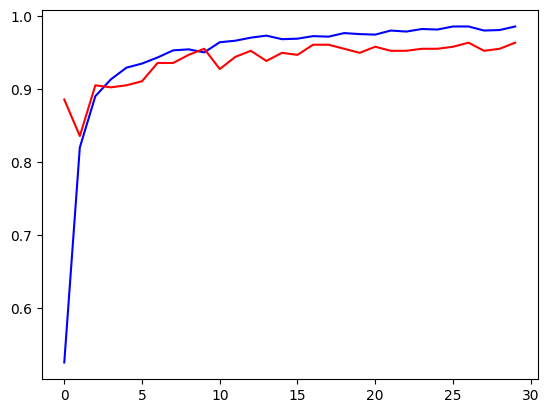

In [7]:
plt.plot(history.history["accuracy"], color="blue")
plt.plot(history.history["val_accuracy"], color="red")
